# Solve and plot the Kuprenas et al. (2018) modification to the Winterwerp (1998) average floc size model.

In [1]:
%pylab inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


## Define functions

In [2]:
# The modified W98 ODE to be integrated: dDdt = A-B
def dDdtW98M(D, t, Ka, Kb, nf, Dp, c2, C, G): 
    q = c1+c2*D/sqrt(nu/G)
    A = Ka*(Dp**(nf-3)/(nf*rhos))*G*C*D**(4-nf) # aggregation term
    B = Kb*((Dp**(-p))/nf)*(mu/Fy)**q*G**(q+1)*(D-Dp)**p*D**(2*q+1) # breakup term
    dDdt = A-B
    return dDdt

def W98Meq(De,Ka, Kb,Fy, c2, C, G):
    q = c1+c2*De/sqrt(nu/G)
    return De-(Ka/(Kb*rhos))**(1/(2*q))*(mu/Fy)**(-1/2)*C**(1/(2*q))*G**(-1/2)
    
def density(To,Sppt):
    rho_fresh=1000*(1-(To +288.9414)/(508929.2*(To+68.12963))*(To-3.9863)**2)
    Acoef = 0.824493 - 0.0040899*To + 0.000076438*To**2 -0.00000082467*To**3 + 0.0000000053675*To**4
    Bcoef = -0.005724 + 0.00010227*To - 0.0000016546*To**2
    return rho_fresh + Acoef*Sppt + Bcoef*Sppt**(3/2) + 0.00048314*Sppt**2

def visc(To):
    return 2.7488e-07+1.4907e-06*exp(-0.034812*To)

## Setup and solve

In [3]:
"""
User input --------------------------------------------------------
"""
# Fluid properties 
G = 50.          # turbulent shear rate[s-1]
To = 20          # temperature in degC
Sppt = 0         # salinity in parts per thousand 

# Sediment properties
C = 50/10**3     # suspended sediment concentration [g/L]
Dp = 5/10**6     # primary particle size [m]
Fy = 1e-10       # floc yeild strength [N]
rhos = 2650.     # sediment density [kg/m3]
nf = 2.0         # fractal dimension

# Calculation inputs 
tstart_min = 1   # minute to start the integration at
tend_min = 1000  # minute to end the integration at
D0 = Dp #50/10**6    # floc size at tstart_min [m]
Npts = 10000     # number of points in calculation

# initial guess for fit values (change if there are convergence issues) 
Ka = 0.45
Kb = 1.16e-6

# coefficients for modification to q
c1 = 0.5
c2 = 1.5

"""
Setup calculations ----------------------------------------------------
"""
# Pre-integration calcs and array setup
rho = density(To,Sppt)
nu = visc(To)
mu = nu*rho
p = 3.-nf
eta = sqrt(nu/G)

# Setup time array for integration
t = linspace(tstart_min*60,tend_min*60,Npts)

"""
Solve equation -------------------------------------------------------
"""
D = odeint(dDdtW98M, D0, t, args=(Ka, Kb, nf, Dp, c2, C, G))
Dfe = D[-1]    # equilibrium model floc size in [m]

## Plot

The equilibrium floc size is: 90.0 [µm]


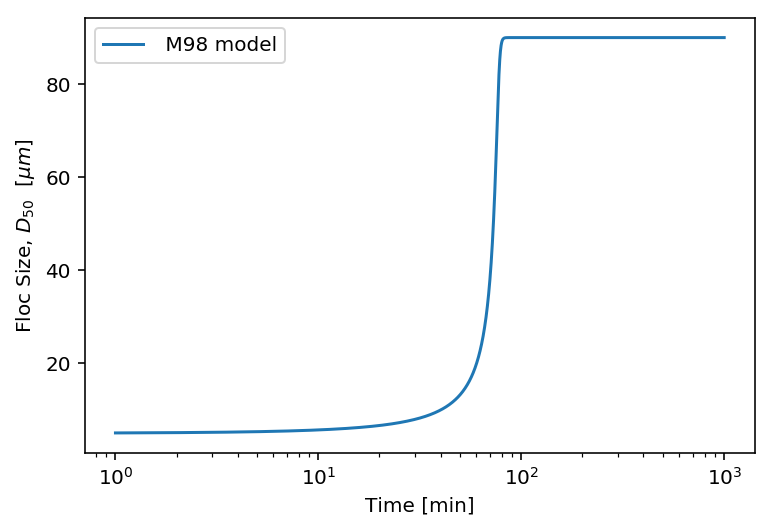

In [4]:
fig, ax = plt.subplots()
ax.plot(t/60,D*10**6, label=' M98 model')
ax.set_xscale('log'),
ax.set_xlabel('Time [min]')
ax.set_ylabel('Floc Size, $D_{50}$  [$\mu m$]')
legend()
print('The equilibrium floc size is:', around(Dfe[0]*10**6,decimals=1),'[µm]')